In [ ]:
 import pandas as pd
import numpy as np
from scipy.special import softmax

## 전체 액션 중 인사이트에 가져갈 액션만 분류하기

In [ ]:
result = pd.read_excel('[hy] 3dcx_total.xlsx')
result

,Touchpoint-Actor-Action,Computed,Connected,Shared,최종,Insight
0,T1-A1-A1,0.989230,0.990524,0.991492,Shared,2
1,T1-A1-A2,0.987718,0.990382,0.989316,Connected,1
2,T1-A1-A3,0.989573,0.991403,0.992320,Shared,6
3,T1-A1-A4,0.992739,0.994018,0.994770,Shared,5
4,T1-A2-A1,0.997528,0.996762,0.997408,Computed,4
5,T1-A2-A2,0.996789,0.994657,0.995472,Computed,4
6,T1-A2-A3,0.997096,0.996646,0.997631,Shared,1
7,T1-A2-A4,0.997403,0.995971,0.996760,Computed,5
8,T1-A2-A5,0.997279,0.995982,0.996890,Computed,5
9,T2-A1-A1,0.990809,0.991843,0.992841,Shared,4


In [ ]:
insight1 = result.loc[result['Insight'] == 1]
insight2 = result.loc[result['Insight'] == 2]
insight3 = result.loc[result['Insight'] == 3]
insight4 = result.loc[result['Insight'] == 4]
insight5 = result.loc[result['Insight'] == 5]
insight6 = result.loc[result['Insight'] == 6]
insight7 = result.loc[result['Insight'] == 7]

In [ ]:
insight1 = insight1[['Touchpoint-Actor-Action', 'Computed', 'Connected', 'Shared', '최종']]
insight2 = insight2[['Touchpoint-Actor-Action', 'Computed', 'Connected', 'Shared', '최종']]
insight3 = insight3[['Touchpoint-Actor-Action', 'Computed', 'Connected', 'Shared', '최종']]
insight4 = insight4[['Touchpoint-Actor-Action', 'Computed', 'Connected', 'Shared', '최종']]
insight5 = insight5[['Touchpoint-Actor-Action', 'Computed', 'Connected', 'Shared', '최종']]
insight6 = insight6[['Touchpoint-Actor-Action', 'Computed', 'Connected', 'Shared', '최종']]
insight7 = insight7[['Touchpoint-Actor-Action', 'Computed', 'Connected', 'Shared', '최종']]

In [ ]:
mean_insight1 = insight1.mean(numeric_only = True)
mean_insight2 = insight2.mean(numeric_only = True)
mean_insight3 = insight3.mean(numeric_only = True)
mean_insight4 = insight4.mean(numeric_only = True)
mean_insight5 = insight5.mean(numeric_only = True)
mean_insight6 = insight6.mean(numeric_only = True)
mean_insight7 = insight7.mean(numeric_only = True)
type(mean_insight7)

pandas.core.series.Series

In [ ]:
values1 = dict(mean_insight1)
values2 = dict(mean_insight2)
values3 = dict(mean_insight3)
values4 = dict(mean_insight4)
values5 = dict(mean_insight5)
values6 = dict(mean_insight6)
values7 = dict(mean_insight7)

## 로그 스케일러 적용 시 모든 값이 비슷하게 수렴해서 선형변환 스케일링 적용 --> softmax 적용
- softmax는 0~1의 값을 주기 위해

In [ ]:
# 소프트맥스 함수 정의
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# 선형 변환 소프트맥스를 적용하고 결과를 데이터프레임으로 반환하는 함수
def apply_softmax(values_dict):
    values_array = np.array(list(values_dict.values()))
    scaled_values = values_array * 1000
    softmax_scaled = softmax(scaled_values)
    return pd.DataFrame(softmax_scaled, index=values_dict.keys(), columns=['Softmax'])

## 시각화

- 아예 코드 합쳐버림

In [ ]:
import matplotlib.pyplot as plt
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='AppleGothic') # window사용자는 Malgun Gothic
plt.rcParams["figure.figsize"] = (10, 10)

In [ ]:
# 레이더 차트를 그리는 함수
def plot_radar_chart(result, title, filename):
    labels = result.index.tolist()
    values = result['Softmax'].tolist()
    values += values[:1]
    labels += labels[:1]
    angles = [n / 3.0 * 2 * np.pi for n in range(4)]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], labels[:-1], color='black', size=12)
    ax.set_rlabel_position(0)
    plt.yticks([0.5, 1.0], ["0.5", "1.0"], color="grey", size=10)
    plt.ylim(0, 1)
    ax.plot(angles, values, linewidth=0)
    ax.fill(angles, values, color='red', alpha=0.4)
    ax.spines['polar'].set_visible(False)
    fig.text(0.1, 0.9, title, size=20, color='red', ha='left', va='top')
    plt.show()
    fig.savefig(filename)

In [ ]:
# 레이더 차트를 그리는 함수 > 이미지 파일 내에 제목 없는 버전

def radar_chart_without_titles(result, filename):
    labels = result.index.tolist()
    values = result['Softmax'].tolist()
    values += values[:1]
    labels += labels[:1]
    angles = [n / 3.0 * 2 * np.pi for n in range(4)]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], labels[:-1], color='black', size=12)
    ax.set_rlabel_position(0)
    plt.yticks([0.5, 1.0], ["0.5", "1.0"], color="grey", size=10)
    plt.ylim(0, 1)
    ax.plot(angles, values, linewidth=0)
    ax.fill(angles, values, color='red', alpha=0.4)
    ax.spines['polar'].set_visible(False)
    # fig.text(0.1, 0.9, title, size=20, color='red', ha='left', va='top')
    plt.show()
    fig.savefig(filename)

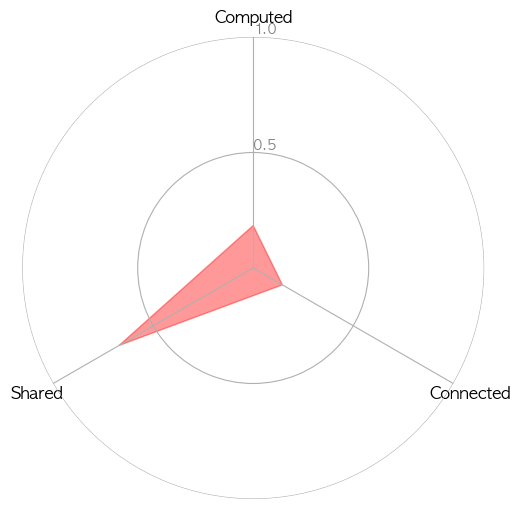

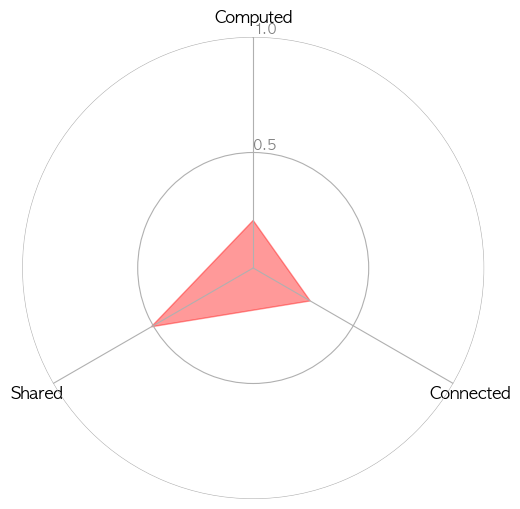

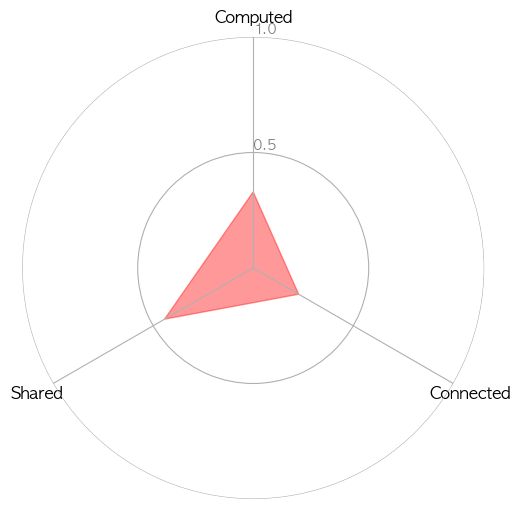

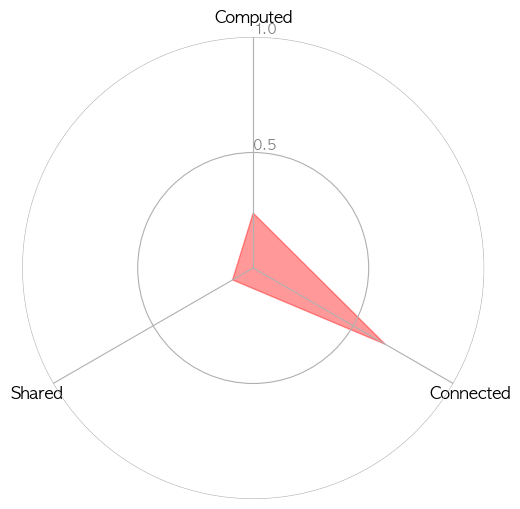

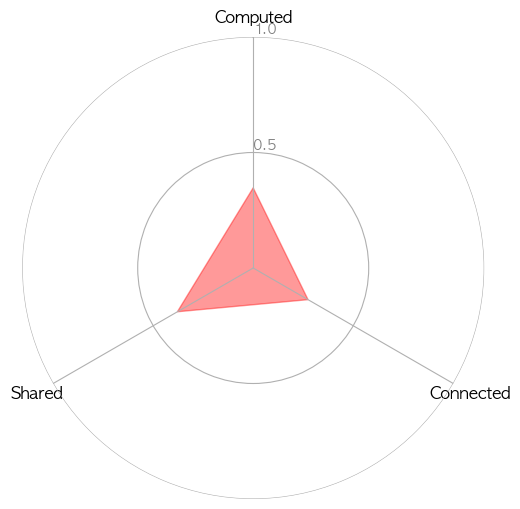

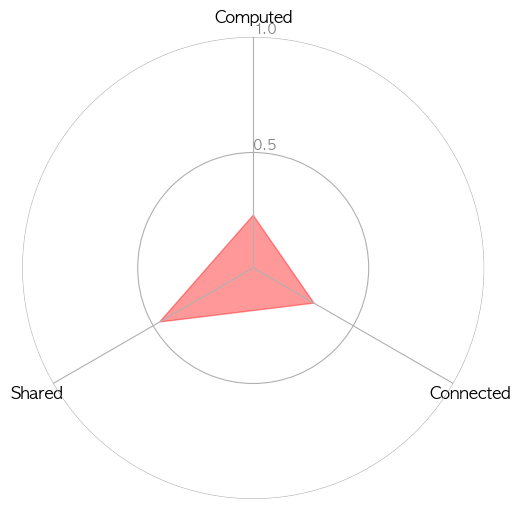

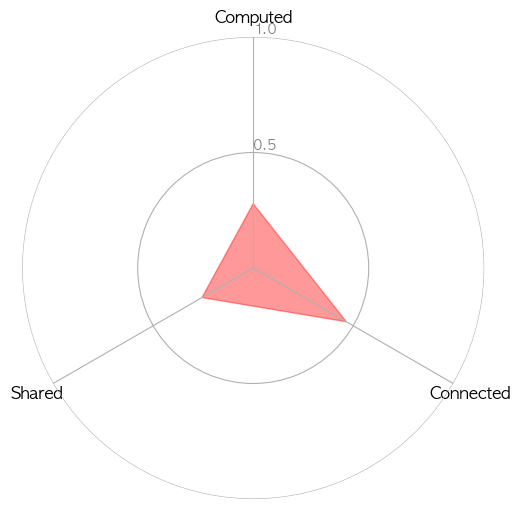

In [ ]:
# 각 insight 데이터프레임의 평균 값을 계산하고 소프트맥스를 적용하는 반복 작업
insights = [insight1, insight2, insight3, insight4, insight5, insight6, insight7]
titles = ['Insight 1', 'Insight 2', 'Insight 3', 'Insight 4', 'Insight 5', 'Insight 6', 'Insight 7']
filenames = ['insight1_radar.png', 'insight2_radar.png', 'insight3_radar.png', 'insight4_radar.png', 'insight5_radar.png', 'insight6_radar.png', 'insight7_radar.png']

for i, insight in enumerate(insights):
    mean_insight = insight.mean(numeric_only=True)
    values_dict = dict(mean_insight)
    result = apply_softmax(values_dict)
    radar_chart_without_titles(result, filenames[i]) # 차트 내 제목 없는 버전
    # plot_radar_chart(result, titles[i], filenames[i]) # 차트 내 제목 있는 버전